<a href="https://colab.research.google.com/github/Hinal-Srivastava/covid19_vaccinations/blob/main/Vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("covid19_vaccine_dataset.csv")

df.head()

,Country,Start(doses administered/100 people),Latest(doses administered/100 people),Progress,Start,End,Active Days,Lat,Long,ISO_Code
0,Afghanistan,0,0.00,0.00,NaN,NaN,0.0,33.930,67.700,AFG
1,Aland Islands,0,0.00,0.00,NaN,NaN,0.0,60.017,19.910,ALA
2,Albania,0,0.00,0.00,NaN,NaN,0.0,NaN,NaN,ALB
3,Algeria,0.00,0.01,0.01,29-01-2021,30-01-2021,1.0,28.000,1.659,DZA
4,Andorra,0.75,1.34,0.60,25-01-2021,01-02-2021,7.0,45.500,1.520,AND


In [4]:
df.describe()

,Latest(doses administered/100 people),Progress,Active Days,Lat,Long
count,69.000000,197.000000,68.000000,67.000000,67.00000
mean,4.621739,1.527462,27.308824,33.640507,13.41706
std,9.622195,5.822688,14.785287,23.334881,52.23031
min,0.000000,0.000000,0.000000,-38.410000,-106.34000
25%,0.730000,0.000000,18.500000,23.655000,-0.95500
50%,2.690000,0.000000,30.500000,39.390000,15.47000
75%,3.860000,0.690000,38.000000,50.155000,35.04500
max,61.660000,61.660000,52.000000,64.960000,113.92000


In [5]:
fig = px.choropleth(df, locations="ISO_Code",
                    color="Progress", 
                    hover_name="Country",
                    title = 'Vaccines Administration in Different Countries',
                    color_continuous_scale=px.colors.sequential.Sunset)

fig.show()

In [5]:
df = pd.read_csv("country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [8]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.508000e+03,1.196000e+03,6.680000e+02,1.229000e+03,2.237000e+03,1508.000000,1196.000000,668.000000,2237.000000
mean,1.007529e+06,1.032476e+06,2.345366e+05,6.314679e+04,5.097565e+04,3.991983,4.171455,0.953069,1874.377291
std,3.305799e+06,3.170607e+06,7.428641e+05,1.708937e+05,1.489367e+05,7.815843,7.177311,2.722411,3463.339897
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.192175e+04,2.567400e+04,4.610000e+03,1.808000e+03,1.249000e+03,0.370000,0.450000,0.050000,314.000000
50%,1.172085e+05,1.327220e+05,1.903600e+04,9.831000e+03,5.857000e+03,1.420000,1.710000,0.270000,848.000000
75%,5.141592e+05,5.773322e+05,1.175120e+05,5.130500e+04,2.529900e+04,3.362500,3.262500,0.780000,1524.000000
max,3.520371e+07,3.120000e+07,6.926050e+06,1.693241e+06,1.355451e+06,61.660000,39.080000,22.710000,30869.000000


In [6]:
new_df = df.groupby(["country",'iso_code','vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated',
                                           'daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                                           "people_fully_vaccinated_per_hundred",'daily_vaccinations_per_million'].max().reset_index()
new_df.head()

,country,iso_code,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Algeria,DZA,Sputnik V,30.0,NaN,NaN,30.0,0.00,NaN,NaN,1.0
1,Andorra,AND,Pfizer/BioNTech,1036.0,1036.0,NaN,66.0,1.34,1.34,NaN,854.0
2,Argentina,ARG,Sputnik V,444018.0,297717.0,146301.0,16574.0,0.98,0.66,0.32,367.0
3,Austria,AUT,Pfizer/BioNTech,238241.0,198912.0,39329.0,12278.0,2.65,2.21,0.44,1363.0
4,Bahrain,BHR,"Pfizer/BioNTech, Sinopharm",177233.0,177233.0,NaN,11106.0,10.42,10.42,NaN,6527.0


In [12]:
new_df['vaccines'].value_counts()

Pfizer/BioNTech                          37
Moderna, Pfizer/BioNTech                 14
Oxford/AstraZeneca                        6
Sputnik V                                 4
Oxford/AstraZeneca, Sinopharm             2
Sinovac                                   2
Pfizer/BioNTech, Sinopharm                2
Sinopharm                                 1
CNBG, Sinovac                             1
Pfizer/BioNTech, Sinopharm, Sputnik V     1
Oxford/AstraZeneca, Sinovac               1
Covaxin, Oxford/AstraZeneca               1
Oxford/AstraZeneca, Pfizer/BioNTech       1
Pfizer/BioNTech, Sinovac                  1
Name: vaccines, dtype: int64


In [7]:
data = new_df[['country','total_vaccinations']].nlargest(25,'total_vaccinations')
fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries",)
fig.show()

In [14]:
vaccine = new_df["vaccines"].value_counts().reset_index()
vaccine.columns = ['Vaccines','Number of Country']
vaccine.head()

,Vaccines,Number of Country
0,Pfizer/BioNTech,37
1,"Moderna, Pfizer/BioNTech",14
2,Oxford/AstraZeneca,6
3,Sputnik V,4
4,"Oxford/AstraZeneca, Sinopharm",2


In [15]:
fig = px.bar(vaccine,x='Vaccines',y='Number of Country',hover_data = '',title = 'Number of Countries each vaccine is being used')
fig.show()

In [10]:
fig = px.choropleth(new_df,locations = 'iso_code',color = 'vaccines',
                   title = 'Vaccines used by specefic Country',hover_data= ['total_vaccinations'])
fig.show()

In [ ]:
pip install plotly==4.5

In [11]:
fig = px.treemap(new_df,names = 'country',values = 'total_vaccinations',path = ['vaccines','country'],
                 title="Total Vaccinations per country grouped by Vaccines",
                 color_discrete_sequence =px.colors.qualitative.Set1)
fig.show()

In [9]:
fig = px.treemap(new_df,names = 'country',values = 'people_vaccinated',path = ['vaccines','country'],
                 title="People Vaccinated per country grouped by Vaccines",
                 color_discrete_sequence =px.colors.qualitative.Bold)
fig.show()

In [12]:
df_comments=pd.read_csv("comments.csv")
df_comments.head()

,post_id,post_author,post_date,post_title,post_score,post_permalink,post_url,comment_id,comment_author,comment_date,comment_parent_id,comment_edited,comment_score,comment_body
0,kdmkbz,KinnerNevada,2020-12-15 14:21:20,"Moderna's vaccine is highly effective, FDA say...",42481,/r/Coronavirus/comments/kdmkbz/modernas_vaccin...,https://www.nbcnews.com/health/health-news/mod...,gfx8br4,AutoModerator,2020-12-15 14:21:21,t3_kdmkbz,False,1,"This post appears to be about vaccines, please..."
1,kdmkbz,KinnerNevada,2020-12-15 14:21:20,"Moderna's vaccine is highly effective, FDA say...",42481,/r/Coronavirus/comments/kdmkbz/modernas_vaccin...,https://www.nbcnews.com/health/health-news/mod...,gfx930g,Hothabanero6,2020-12-15 14:28:43,t3_kdmkbz,False,1784,Who's ahead in the pool for the third vaccine ...
2,kdmkbz,KinnerNevada,2020-12-15 14:21:20,"Moderna's vaccine is highly effective, FDA say...",42481,/r/Coronavirus/comments/kdmkbz/modernas_vaccin...,https://www.nbcnews.com/health/health-news/mod...,gfxaiv8,jsinkwitz,2020-12-15 14:42:16,t3_kdmkbz,False,1905,"""asymptomatic infection was reduced by 63 perc..."
3,kdmkbz,KinnerNevada,2020-12-15 14:21:20,"Moderna's vaccine is highly effective, FDA say...",42481,/r/Coronavirus/comments/kdmkbz/modernas_vaccin...,https://www.nbcnews.com/health/health-news/mod...,gfxglf1,TheyreGoodDogsBrent,2020-12-15 15:36:09,t3_kdmkbz,False,3503,> and appears to prevent the spread of the vir...
4,kdmkbz,KinnerNevada,2020-12-15 14:21:20,"Moderna's vaccine is highly effective, FDA say...",42481,/r/Coronavirus/comments/kdmkbz/modernas_vaccin...,https://www.nbcnews.com/health/health-news/mod...,gfxr0fa,BG1234567,2020-12-15 17:01:14,t3_kdmkbz,False,326,The fact that there are multiple companies mak...


In [13]:
df_comments.describe()

,post_score,comment_score
count,34768.000000,34768.000000
mean,6790.476012,17.651461
std,11299.739333,116.955921
min,94.000000,-153.000000
25%,467.000000,1.000000
50%,1228.000000,3.000000
75%,4635.000000,10.000000
max,42481.000000,9449.000000


In [15]:
stopwords = set(STOPWORDS)
stopwords.add('>')
stopwords.add('\n>')
stopwords.add("\n\n")
stopwords.add("!")
stopwords.add("“")
stopwords.add("+")
stopwords.add("will")
stopwords.add("still")
stopwords.add("even")
stopwords.add("think")
stopwords.add("getting")
stopwords.add("going")
stopwords.add("said")
stopwords.add("new")
stopwords.add("really")
stopwords.add("know")
stopwords.add("well")
stopwords.add("now")
stopwords.add("need")
stopwords.add("already")
stopwords.add("actually")
stopwords.add("probably")
stopwords.add("got")
stopwords.add("got")
stopwords.add("likely")
stopwords.add("way")
stopwords.add("everyone")

In [38]:
text=df_comments["comment_body"].to_csv()
comment_wc = WordCloud(
    background_color='white',
    max_words=800,
    max_font_size=60, 
    scale=5,
    random_state=1,
    mode='RGB',
    stopwords=stopwords
)
comment_wc.generate(text)

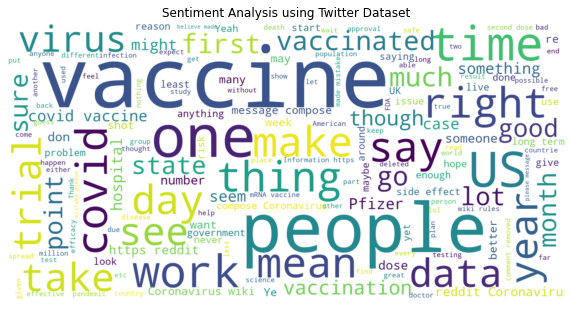

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(comment_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Sentiment Analysis using Twitter Dataset')
plt.show()